# 读取数据

In [5]:
import pandas as pd
path ='/Users/ness001/Downloads/train.csv'
train_data=pd.read_csv(path,nrows=10_000_000)
test_data=pd.read_csv('/Users/ness001/Downloads/test.csv')
#只选取前100000000数据做建模 防止内存爆掉，这里也要修改

In [2]:
暂时只选取前100000000数据做建模，防止内存爆掉，这里是优化的点*

SyntaxError: invalid character in identifier (<ipython-input-2-0c0a50e784e7>, line 1)

# 探索性数据分析eda
作用 ：为了获得直观了解
列出数据集的前几行
输出一些统计信息：样本数、均值、标准差、最大值、最小值和分位数
检查一下数据类型
检查目标变量分布
检查一下各个特征

In [5]:
#探索性数据分析#
print(train_data.head())
print(train_data.describe())
train_data.dtypes
print(train_data.hist('fare_amount'))
print(train_data.columns)
print(test_data.columns)
#可见数据中有两个分类变量，key和picpupdatetime

                             key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3       

可见数据中有两个分类变量，key和picpupdatetime

# 数据修剪

## 缺失值处理
看一下有多少缺失值，选择处理方法

In [6]:
#缺失值处理，先看一下缺失值有多少，然后选择处理方法
print(train_data.isnull().sum())
train_data.dtypes

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    69
dropoff_latitude     69
passenger_count       0
dtype: int64


key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
可以看到我们这里缺失值量并不多，使用删除法

常见的缺失值处理方法有
-删除法
-插值法（这里你们搜索下资料，写的具体点，ppt上也要写）

In [7]:
#处理方法有插值法和删除法，我们这里缺失量不多，并且不是连续型变量中的数值，所以选择直接删除这几行
print('Old size: %d' % len(train_data))
train_data = train_data.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_data))
#检查一下行数

Old size: 10000000
New size: 9999931


## 数值规范化

In [ ]:
将训练集和测试集的时间，即key和pickup时间特征转化为时间格式的新特征

In [8]:
train_data['key'] = pd.to_datetime(train_data['key'])
test_data['key'] = pd.to_datetime(test_data['key'])

In [9]:
data = [train_data,test_data]
for i in data:
    i['Year'] = i['key'].dt.year
    i['Month'] = i['key'].dt.month
    i['Date'] = i['key'].dt.day
    i['Day of Week'] = i['key'].dt.dayofweek
    i['Hour'] = i['key'].dt.hour

In [10]:
train_data.head()
test_data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21


## 反直觉的值处理

In [ ]:
费用不可能是负数

In [11]:
from collections import Counter
Counter(train_data['fare_amount']<0)

Counter({False: 9999511, True: 420})

In [12]:
train_data = train_data.drop(train_data[train_data['fare_amount']<0].index, axis=0)
train_data.shape

(9999511, 13)

In [ ]:
乘客人数不可能超过六个

In [13]:
train_data = train_data.drop(train_data[train_data['passenger_count']>6].index, axis = 0)

In [14]:
同理
Quick Googling gave me this info

Latitudes range from -90 to 90.
Longitudes range from -180 to 180.

SyntaxError: invalid syntax (<ipython-input-14-b3023f3c8e11>, line 2)

In [15]:
train_data = train_data.drop(((train_data[train_data['pickup_latitude']<-90])|(train_data[train_data['pickup_latitude']>90])).index, axis=0)

train_data = train_data.drop(((train_data[train_data['pickup_longitude']<-180])|(train_data[train_data['pickup_longitude']>180])).index, axis=0)

In [ ]:
检查一下处理后的形状

In [16]:
train_data.shape

(9999193, 13)

## 增加/减少特征
商业考虑：我们需要距离来预测车费，所以需要新增特征
下面这段函数可以批量处理经纬度差值

In [17]:
#对数据做编辑，缺失数据处理，增加/减少特征，
#商业考虑：我们需要距离来预测车费，所以需要新增变量
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(train_data)

In [ ]:
更准确地，我们可以使用半正矢公式，查询得公式

In [18]:
import numpy as np
def haversine_distance(lat1, long1, lat2, long2):
    data = [train_data, test_data]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['Distance'] = d
    return d

haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
train_data.head()
test_data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Distance
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.323260
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.425353
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,0.618628
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.961033
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.387301


## 离群点处理
查看所有行中，我们新增的两个特征变量的分布，观察是否有离群点
确定判别标准，修建数据

Old size: 9999193
New size: 9999083


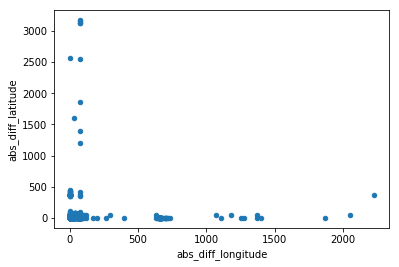

In [19]:
plot = train_data.iloc[0:].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

#观作图察到离群点，离群点处理
#考虑到都是在纽约市内的乘车记录，照理说经纬度之差应该不会太大，所以我们有理由相信那些偏离点是离群点
#多次更改其中的参数

print('Old size: %d' % len(train_data))
train_data = train_data[(train_data.abs_diff_longitude < 500) & (train_data.abs_diff_latitude < 1500)]
print('New size: %d' % len(train_data))

# 初步建模

## 确定目标变量和解释变量

In [ ]:
先再次检查一下所有特征
这是一个回归问题

In [20]:
print(train_data.columns)

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'Year', 'Month', 'Date', 'Day of Week', 'Hour',
       'abs_diff_longitude', 'abs_diff_latitude', 'Distance'],
      dtype='object')


In [ ]:
令xxx为目标变量
令xxx/xxx/xxx为解释变量

In [21]:
#确定确定目标变量和解释变量
y=train_data.fare_amount
features=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude', 'passenger_count', 'Distance', 'Year', 'Month', 'Date', 'Day of Week', 'Hour']
X=train_data[features]

test_X = test_data[features]

In [ ]:
重新索引


In [22]:
train_data.reindex(np.random.permutation(train_data.index))

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,abs_diff_longitude,abs_diff_latitude,Distance
8317839,2009-04-20 20:13:00.000000186,5.30,2009-04-20 20:13:00 UTC,-73.957355,40.769802,-73.967803,40.755962,1,2009,4,20,0,20,0.010448,0.013840,1.772746
5251490,2014-11-24 17:07:05.000000200,11.00,2014-11-24 17:07:05 UTC,-73.948111,40.782916,-73.980353,40.785262,1,2014,11,24,0,17,0.032242,0.002346,2.727094
8362298,2014-10-31 08:21:00.000000195,3.00,2014-10-31 08:21:00 UTC,-73.990180,40.751480,-73.993280,40.747170,1,2014,10,31,4,8,0.003100,0.004310,0.545778
5556531,2012-10-12 22:25:00.000000108,9.00,2012-10-12 22:25:00 UTC,-73.984857,40.739280,-74.006540,40.747882,6,2012,10,12,4,22,0.021683,0.008602,2.061967
4557358,2012-10-12 09:17:00.000000179,13.50,2012-10-12 09:17:00 UTC,-73.973462,40.743547,-73.998155,40.754970,2,2012,10,12,4,9,0.024693,0.011423,2.437244
592625,2010-06-24 18:41:00.000000151,3.70,2010-06-24 18:41:00 UTC,-73.960133,40.770352,-73.955828,40.779365,2,2010,6,24,3,18,0.004305,0.009013,1.065746
3133580,2015-01-11 14:30:44.000000200,11.00,2015-01-11 14:30:44 UTC,-73.987427,40.750381,-73.986717,40.759350,1,2015,1,11,6,14,0.000710,0.008968,0.999025
8102926,2014-04-01 15:57:00.000000145,8.00,2014-04-01 15:57:00 UTC,-73.981590,40.769380,-73.967782,40.761552,1,2014,4,1,1,15,0.013808,0.007828,1.452564
6405608,2014-04-28 19:30:00.000000134,3.50,2014-04-28 19:30:00 UTC,-73.995158,40.744695,-73.998497,40.740127,1,2014,4,28,0,19,0.003339,0.004568,0.580630
7217132,2013-06-17 16:25:00.000000880,8.50,2013-06-17 16:25:00 UTC,-73.976912,40.764010,-73.993293,40.757527,2,2013,6,17,0,16,0.016381,0.006483,1.556647


In [ ]:
检查一下形状

In [23]:
#check
print(y.shape)
print(X.shape)


(9999083,)
(9999083, 11)


## 分离数据

In [24]:
from sklearn.model_selection import train_test_split #分离模型
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state=1)

## 训练模型

In [ ]:
选用随机森林

可选用的回归模型有
Random Forest 
GBM 
Linear Regression 
Ridge 
Lasso 
SVR

In [41]:
from sklearn.ensemble import RandomForestRegressor
betamodel=RandomForestRegressor(random_state=1)
betamodel.fit(train_X,train_y)

/Users/ness001/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

## 模型评估

In [ ]:
预测验证集

In [42]:
preds = betamodel.predict(val_X)

### rmse

In [47]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(val_y,preds))

18.036771674976837


In [ ]:
比较大

### r-square

In [43]:
from sklearn.metrics import r2_score
print(r2_score(val_y,preds))

0.8092272139819319


# 再次建模

## 方法一：调整模型超参数


随机森林可调整的参数有
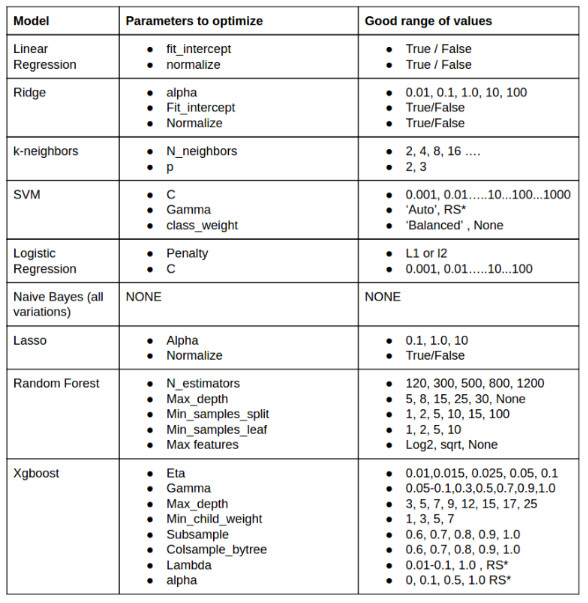
n estimators 120 300 500 800 1200
max depth 5 8 15 25 30
min samples split 1 2 5 10 15 100
min samples leaf 1 2 5 10
max features log2 sqrt

### 再次评估

## 方法二：选用新模型
可选用的回归模型有
Random Forest 
GBM 
Linear Regression 
Ridge 
Lasso 
SVR


### liner regression

In [ ]:
线性回归，效果很垃圾

In [48]:
from sklearn import linear_model
lin_model=linear_model.LinearRegression()
lin_model.fit(train_X,train_y)
new_preds=lin_model.predict(val_X)
new_mse=mean_squared_error(val_y,new_preds)
print('new mse=%d'%new_mse)
print('new r^2=%f'%r2_score(val_y,new_preds))

new mse=92
new r^2=0.024370


### 支持向量机回归

In [ ]:
from sklearn.svm import SVR
svr_model=SVR(kernel='linear')
svr_model.fit(train_X,train_y)
new_preds=svr_model.predict(val_X)
new_mse=mean_squared_error(val_y,new_preds)
print('new mse=%d'%new_mse)
print('new r^2=%f'%r2_score(val_y,new_preds))

### 提升树回归

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(train_X,train_y)
gbr_preds=gbr.predict(val_X)
print(mean_square_error(val_y,gbr_preds))

## lgbm

In [2]:
import lightgbm as lgbm


/Users/ness001/anaconda3/envs/pytorch/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': -1,
        'verbose': 0,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'subsample_freq': 1,
        'colsample_bytree': 0.6,
        'reg_aplha': 1,
        'reg_lambda': 0.001,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1     
    }

In [4]:
pred_test_y = np.zeros(test_X.shape[0])
pred_test_y.shape

NameError: name 'np' is not defined

In [28]:
train_set = lgbm.Dataset(train_X, train_y, silent=True)
train_set

In [1]:
model = lgbm.train(params, train_set = train_set, num_boost_round=300)

NameError: name 'lgbm' is not defined

In [ ]:
lgbm_preds=model.predict(val_X, num_iteration = model.best_iteration)
new_mse=mean_squared_error(val_y,lgbm_preds)
print('new mse=%d'%new_mse)
print('new r^2=%f'%r2_score(val_y,lgbm_preds))

# 最终模型

In [ ]:
鉴于时间与知识限制，我们只能优化到这里。

In [ ]:
最终，我们决定选用xxx模型，此时我们选用全部训练集进行训练

In [ ]:
再对测试集做预测